In [71]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import magic_moment_method.vehicle_params as vehicle_params
import magic_moment_method.state_solver as state_solver
from magic_moment_method.solver_sweeper import solver_sweeper
import labellines
from scipy.optimize import curve_fit

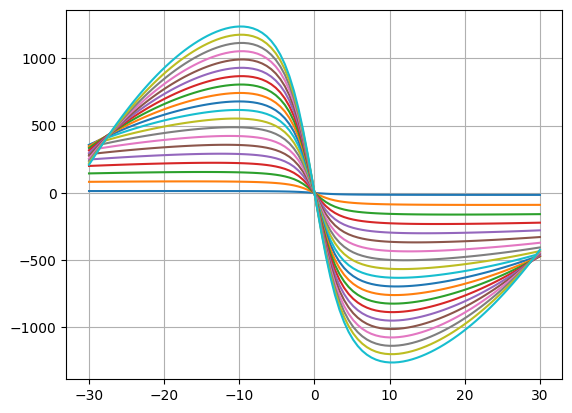

In [72]:
vehicle = vehicle_params.Concept2023(motor_directory="vehicle_params/Eff228.csv")
solver = state_solver.Solver(vehicle)
normal_forces = np.linspace(-10, -1000, 20)
slip_angles = np.linspace(-30 * np.pi / 180, 30 * np.pi / 180, 100)
peaks = []
for f in normal_forces:
    list = []
    for a in slip_angles:
        list.append(solver.vehicle.suspension._Suspension__tires.front_left.lateral_pacejka(0, f, a))
        #print(f, a)
        # solver.vehicle.suspension._Suspension__tires.front_left.lateral_pacejka(0, 
    plt.plot(slip_angles*180/np.pi, list)
    peaks.append(max(list))
plt.grid()


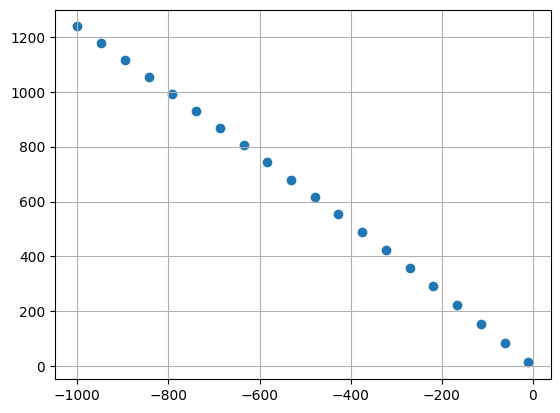

In [73]:
plt.scatter(normal_forces,peaks)
plt.grid()

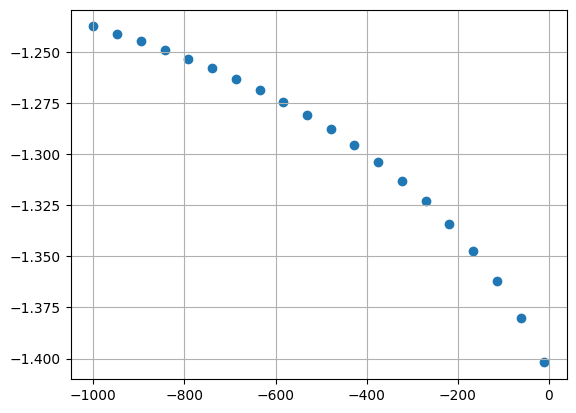

In [74]:
coeff = [(peaks[i]/normal_forces[i]) for i in range(len(peaks))]
plt.scatter(normal_forces,coeff)
plt.grid()

In [81]:
def quadratic(x,a,b,c):
    return x**2*a+x*b+c

popt, pcov = curve_fit(quadratic, normal_forces, coeff)
print(popt)

[-1.40286711e-07 -2.94623750e-04 -1.39632104e+00]


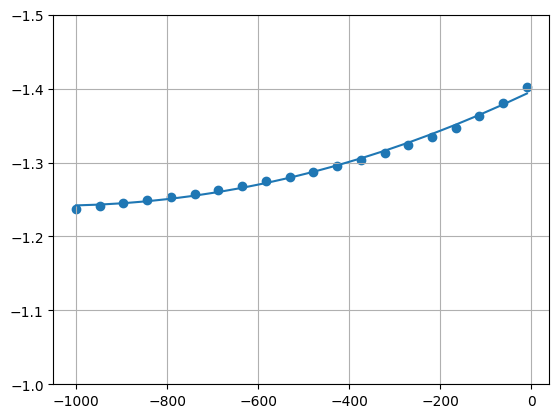

In [82]:
plt.scatter(normal_forces,coeff)
plt.grid()
plt.ylim(-1, -1.5)
plt.plot(normal_forces, quadratic(normal_forces,*popt))

In [124]:
max_accel = 1 #gs
cg_height = 11 # inches
gravity = 1 # g*s^2/(lbf*m)
mass = 650 # lbs
#roll_stiffness_distribution = 0.55 # % front
LLTD = 0.56 # % front
#roll_center_height = 0 # inches
front_trackwidth = 50 # inches
rear_trackwidth = 48 # inches
avg_track = (front_trackwidth + rear_trackwidth) / 2
cg_bias = 0.525 # %

tire_mu = lambda x: quadratic(x, *popt)

total_lateral_load_transfer = max_accel * gravity * mass * cg_height / avg_track

front_load_transfer = total_lateral_load_transfer * LLTD
rear_load_transfer = total_lateral_load_transfer * (1-LLTD)


fr = -mass * gravity * (1-cg_bias)/2 - front_load_transfer
fl = -mass * gravity * (1-cg_bias)/2 + front_load_transfer
rr = -mass * gravity * cg_bias/2 - rear_load_transfer
rl = -mass * gravity * cg_bias/2 + rear_load_transfer

front_lateral_force = fr * tire_mu(fr) + fl * tire_mu(fl)
rear_lateral_force = rr * tire_mu(rr) + rl * tire_mu(rl)
print(front_lateral_force, rear_lateral_force/(front_lateral_force+rear_lateral_force))
#print(fr,fl,rr,rl) tire_mu(-fr)+tire_mu(-fl)+tire_mu(-rr)+tire_mu(-rl)

415.03672256765867 0.5250933867457228


In [126]:
IR = 1.4
springrate = 200 # lbf/in
static_normal = mass / 4
static_spring = static_normal/(springrate * IR**2)
print(static_spring)

0.41454081632653067
